<a href="https://colab.research.google.com/github/apurvakumbhar/ANN/blob/main/activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

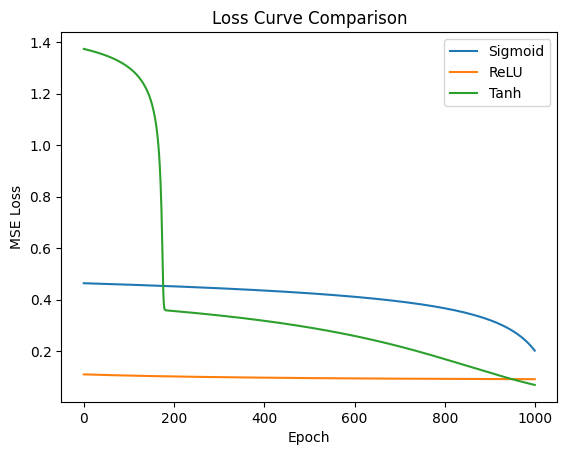

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 5 * X + np.random.normal(0, 5, size=X.shape)  # Adding some noise
y = y / 100  # Normalize scores to [0, 1]

# Activation functions and their derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): s = sigmoid(x); return s * (1 - s)

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x)**2

# Train a single-layer neural network
def train(X, y, activation, activation_deriv, lr=0.01, epochs=1000):
    w, b = np.random.randn(), np.random.randn()
    losses = []

    for _ in range(epochs):
        z = w * X + b
        a = activation(z)
        loss = np.mean((a - y) ** 2)
        losses.append(loss)

        dz = 2 * (a - y) * activation_deriv(z)
        dw = np.mean(dz * X)
        db = np.mean(dz)

        w -= lr * dw
        b -= lr * db

    return w, b, losses

# Run training for each activation
activations = {
    "Sigmoid": (sigmoid, sigmoid_deriv),
    "ReLU": (relu, relu_deriv),
    "Tanh": (tanh, tanh_deriv)
}

# Plot loss curves
for name, (act, act_deriv) in activations.items():
    w, b, loss = train(X, y, act, act_deriv)
    plt.plot(loss, label=name)

plt.title("Loss Curve Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


Training with Identity activation:
Epoch 0, Loss: 10.0733
Epoch 100, Loss: 0.2060
Epoch 200, Loss: 0.0325
Epoch 300, Loss: 0.0294
Epoch 400, Loss: 0.0294
Epoch 500, Loss: 0.0294
Epoch 600, Loss: 0.0294
Epoch 700, Loss: 0.0294
Epoch 800, Loss: 0.0294
Epoch 900, Loss: 0.0294


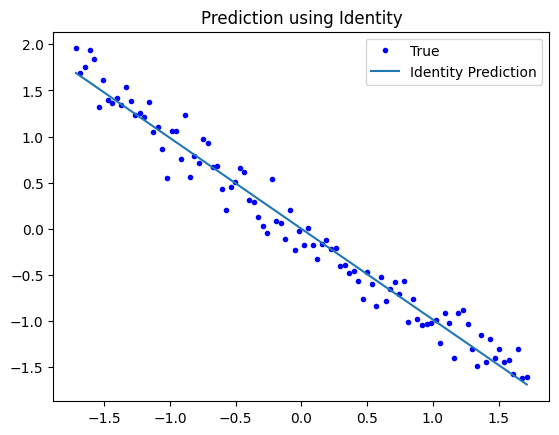


Training with Sigmoid activation:
Epoch 0, Loss: 1.0608
Epoch 100, Loss: 0.9117
Epoch 200, Loss: 0.8197
Epoch 300, Loss: 0.7604
Epoch 400, Loss: 0.7199
Epoch 500, Loss: 0.6908
Epoch 600, Loss: 0.6691
Epoch 700, Loss: 0.6524
Epoch 800, Loss: 0.6393
Epoch 900, Loss: 0.6287


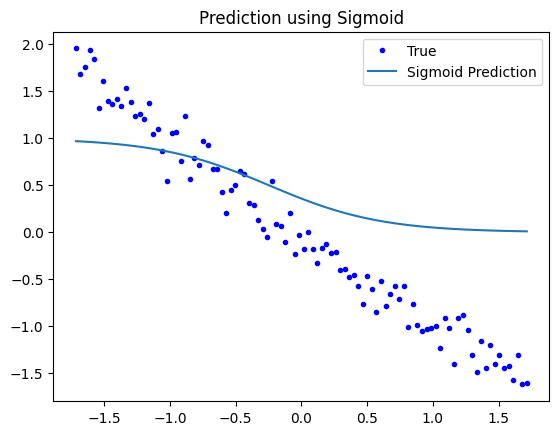


Training with ReLU activation:
Epoch 0, Loss: 3.8454
Epoch 100, Loss: 0.5541
Epoch 200, Loss: 0.4988
Epoch 300, Loss: 0.4917
Epoch 400, Loss: 0.4878
Epoch 500, Loss: 0.4857
Epoch 600, Loss: 0.4843
Epoch 700, Loss: 0.4833
Epoch 800, Loss: 0.4825
Epoch 900, Loss: 0.4821


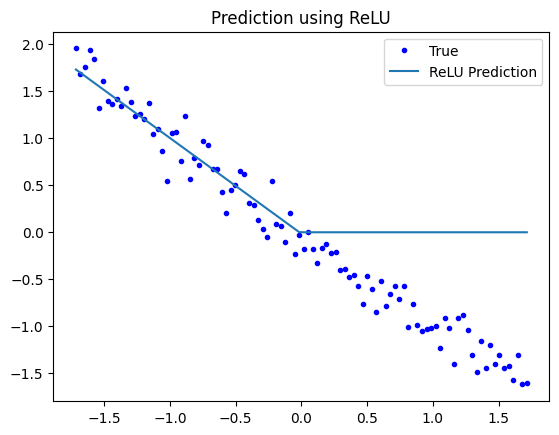

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (altitude in meters vs temperature in °C)
np.random.seed(0)
altitude = np.linspace(0, 3000, 100)
temperature = 25 - 0.0065 * altitude + np.random.normal(0, 1, altitude.shape)  # Lapse rate

# Normalize data
altitude = (altitude - np.mean(altitude)) / np.std(altitude)
temperature = (temperature - np.mean(temperature)) / np.std(temperature)

# Activation functions
def identity(x): return x
def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)

# Derivatives
def d_identity(x): return np.ones_like(x)
def d_sigmoid(x): s = sigmoid(x); return s * (1 - s)
def d_relu(x): return (x > 0).astype(float)

# Gradient Descent
def train_gradient_descent(X, y, activation=identity, d_activation=d_identity, lr=0.01, epochs=1000):
    w = np.random.randn()
    b = np.random.randn()

    for i in range(epochs):
        z = w * X + b
        a = activation(z)
        loss = np.mean((a - y)**2)

        # Gradients
        dz = 2 * (a - y) * d_activation(z)
        dw = np.mean(dz * X)
        db = np.mean(dz)

        # Update weights
        w -= lr * dw
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return w, b

# Train using different activation functions
for name, (act, d_act) in {
    "Identity": (identity, d_identity),
    "Sigmoid": (sigmoid, d_sigmoid),
    "ReLU": (relu, d_relu)
}.items():
    print(f"\nTraining with {name} activation:")
    w, b = train_gradient_descent(altitude, temperature, act, d_act)

    # Plot results
    pred = act(w * altitude + b)
    plt.plot(altitude, temperature, 'b.', label='True')
    plt.plot(altitude, pred, label=f'{name} Prediction')
    plt.title(f"Prediction using {name}")
    plt.legend()
    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Sample training data: house size (in 1000 sq ft) and price (in $100,000s)
X = np.array([[1], [1.5], [2], [2.5], [3], [3.5]])  # Shape (6, 1)
y = np.array([[1.5], [2], [2.5], [3], [3.5], [4]])  # Shape (6, 1)

# Build the neural network model
model = Sequential([
    Input(shape=(1,)),              # Define input shape properly
    Dense(5, activation='relu'),    # Hidden layer
    Dense(1)                        # Output layer (no activation for regression)
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=200, verbose=0)

# Predict the price for a 2200 sq ft house (2.2 in 1000s)
predicted_price = model.predict(np.array([[2.2]]))  # Shape (1, 1)
print("Predicted price for 2200 sq ft house:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted price for 2200 sq ft house: 2.7017794
